# Hypothesis Test

### 0. Import libraries and modules

In [238]:
#for distribution and test
from scipy import stats
from statsmodels.stats.multitest import multipletests
#for array and data frame 
import numpy as np 
import pandas as pd
#for plot
import seaborn as sns

### 1. Load winequality-red.csv and winequality-white.csv files using pandas

In [239]:
#Loading the data
red_w = pd.read_csv('C:/Users/choih/OneDrive/Desktop/winequality-red2.csv' , sep=';')
white_w = pd.read_csv('C:/Users/choih/OneDrive/Desktop/winequality-white2.csv' , sep=';')


### 2. Conduct hypothesis test to test whether the average alcohol of red wines is higher than white wines or not. 

In [240]:
#ttest for compare 2 different mean
tstat,pval = stats.ttest_ind(red_w.alcohol, white_w.alcohol, alternative = "greater")
pval

0.9960660630033288

### 3. Conduct hypothesis test to test whether the alcohol of red wines and the white wines are from the same distribution or not. 

In [241]:
#trying to find if they used different distribution 
ksstat,pval=stats.ks_2samp(red_w.alcohol, white_w.alcohol)
pval

1.132283112957225e-09

### 4. Conduct hypothesis test to test whether the alcohol of red wines follows the normal distribution or not.

In [242]:
#trying to find if it used normal distribution
s2k2,pval=stats.normaltest(red_w.alcohol)
pval

3.3163288473185496e-34

### 5. Conduct two-sided hypothesis tests between red wines and white wines that compare means of each variable. There are 12 variables and the final output will be 12 p-values.

In [243]:
# Two-sided hypothesis test for each variable means.
p_12 = stats.ttest_ind(red_w, white_w, axis=0, alternative='two-sided')

twelve_p = p_12.pvalue
print(twelve_p)




[0.00000000e+000 0.00000000e+000 2.00373570e-052 2.95935415e-185
 0.00000000e+000 0.00000000e+000 0.00000000e+000 7.31960464e-236
 5.92330797e-164 0.00000000e+000 7.86787399e-003 4.88806904e-022]


### 6. Count how many p-values are less than alpha=0.05

In [244]:
#count p-value that less than alpha=0.05
len(twelve_p[np.where(twelve_p<0.05)])

12

### 7. Compute bonferroni-corrected significance at alpha=0.05 and count how many p-values are smaller than that.

In [245]:
#Bonferroni-corrected
bp_12 = 0.05/12

#count p-value that is smaller than the Bonferroni-corrected result
bp_c = len(twelve_p[np.where(twelve_p<bp_12)])
print(bp_c)


11


### 8. Compute bonferroni-corrected p-values and count how many corrected p-values are smaller than alpha=0.05. This should yield the same result of Q7.

In [246]:
#Different way Bonferroni
bpd_12 = multipletests(pvals=twelve_p, alpha=0.05, method="bonferroni")

#Count p-value that is smaller than the Bonferroni-corrected result
bpd_12_c = len(bpd_12[1][np.where(bpd_12[1]<0.05)]) 
bpd_12_c

11

### 9. Compute Benjamini and Hochberg FDR at alpha=0.05 and count how many p-values are smaller than 0.05.

In [250]:
#Benjamini and Hochberg FDR
hp_12=multipletests(pvals=twelve_p, alpha=0.05, method="fdr_bh")


#Count p-value that is smaller than the Benjamini and Hochberg FDR result
hp_12_c = len(hp_12[1][np.where(hp_12[1]<0.05)])  
hp_12_c


12

### 10. Create a plot that compares the p-values obtained in Q5, Q8, and Q9 and briefly explain the results.

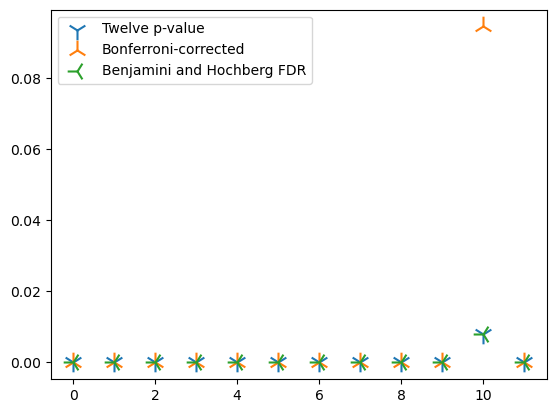

In [248]:
#Pull out the result and put it in the array
twelve_p = p_12.pvalue
c_pvals1 = bpd_12[1] 
c_pvals2 = hp_12[1] 

#Make scatter plot with twelve_p array
plt.scatter(range(len(twelve_p)), twelve_p, label='Twelve p-value', marker='1', s=200)
#Make scatter plot with c_pvals1 array
plt.scatter(range(len(c_pvals1)), c_pvals1, label='Bonferroni-corrected', marker='2', s=200)
#Make scatter plot with c_pvals2 array
plt.scatter(range(len(c_pvals2)), c_pvals2, label='Benjamini and Hochberg FDR', marker='3', s=200)
#Display the legend on the plot
plt.legend()
plt.show()





# Most of the p-values are very close to zero, suggesting strong significance. The Bonferroni has a large corrected p-value (above 0.08).